# Average New House Ireland and Holland

In [1]:
# BASE
import joblib 
import numpy as np
import pandas as pd  
import seaborn as sns  
import missingno as msno  
import matplotlib.pyplot as plt  
import re 

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.float_format',lambda x: '%.3f'%x)
pd.set_option('display.width',500)

In [2]:
irl = pd.read_excel("ireland.xlsx") 
hl  = pd.read_csv("holland.csv") 
eu  = pd.read_csv("house_price_eu.csv")

### Programming DA

In [3]:
# ireland 

irl.head()

YEAR   National     Dublin    Cork     Galway   Limercik  Waterford  Other Areas
0  1997 102037.000 123231.000   96504 111108.000  91236.000  92372.000    94642.000
1  1998 124368.000 159558.000  112166 118917.000 104327.000 108789.000   116639.000
2  1999 147043.000 191942.000  140797 137510.000 122146.000 132510.000   137031.000
3  2000 166155.000 216433.000  164535 160972.000 146838.000 145087.000   154141.000
4  2001 181146.000 252192.000  175372 171578.000 154515.000 157767.000   167493.000

In [4]:
# holland 

hl.head()

Address          City        Price Lot size (m2) Living space size (m2) Build year      Build type                                  House type                                               Roof                     Rooms                             Toilet                     Floors Energy label                                           Position                           Garden Estimated neighbourhood price per m2
0      Bovenweg 223  Sint Pancras    € 525.000        251 m²                 135 m²       1972  Bestaande bouw        Eengezinswoning, 2-onder-1-kapwoning                         Zadeldak bedekt met pannen  5 kamers (4 slaapkamers)       1 badkamer en 1 apart toilet                3 woonlagen            D                                                NaN  Achtertuin, voortuin en zijtuin                                6.035
1  Julianastraat 19   Waddinxveen    € 425.000        181 m²                 109 m²       1935  Bestaande bouw  Herenhuis, geschakelde 2-onder-1-kapwoning  Schilddak bedekt met bitumineuze dakbedekking ...  4 kamers (3 slaapkamers)       1 badkamer en 1 apart toilet                3 woonlagen            E                     Aan rustige weg en in woonwijk           Achtertuin en voortuin                                1.435
2    Kuipersgilde 3        Houten    € 575.000        198 m²                 138 m²       1986  Bestaande bouw        Eengezinswoning, 2-onder-1-kapwoning                         Zadeldak bedekt met pannen  5 kamers (4 slaapkamers)       1 badkamer en 1 apart toilet                3 woonlagen            B                     Aan rustige weg en in woonwijk                       Achtertuin                                1.855
3       De Kamp 1 A     Pannerden    € 259.500        231 m²                  92 m²       1989  Bestaande bouw        Eengezinswoning, 2-onder-1-kapwoning                         Zadeldak bedekt met pannen  5 kamers (3 slaapkamers)   1 badkamer en 2 aparte toiletten                3 woonlagen            B                     Aan rustige weg en in woonwijk  Achtertuin, voortuin en zijtuin                                2.190
4    Wildrijklaan 8    Sassenheim  € 1.050.000        423 m²                 210 m²       2000  Bestaande bouw        Eengezinswoning, 2-onder-1-kapwoning                        Schilddak bedekt met pannen  6 kamers (5 slaapkamers)  2 badkamers en 2 aparte toiletten  4 woonlagen en een kelder            A  Aan rustige weg, aan water, beschutte ligging,...  Achtertuin, voortuin en zijtuin                                1.340

In [5]:
# europa 

eu.head()

COU  Country      IND            Indicator     TIME     Time Unit Code   Unit  PowerCode Code PowerCode  Reference Period Code  Reference Period   Value  Flag Codes  Flags
0  HUN  Hungary  HPI_RPI  Price to rent ratio  2019-Q3  Q3-2019       IDX  Index               0     Units                    NaN               NaN 137.001         NaN    NaN
1  HUN  Hungary  HPI_RPI  Price to rent ratio  2019-Q4  Q4-2019       IDX  Index               0     Units                    NaN               NaN 136.499         NaN    NaN
2  HUN  Hungary  HPI_RPI  Price to rent ratio  2020-Q1  Q1-2020       IDX  Index               0     Units                    NaN               NaN 134.115         NaN    NaN
3  HUN  Hungary  HPI_RPI  Price to rent ratio  2020-Q2  Q2-2020       IDX  Index               0     Units                    NaN               NaN 133.858         NaN    NaN
4  HUN  Hungary  HPI_RPI  Price to rent ratio  2020-Q3  Q3-2020       IDX  Index               0     Units                    NaN               NaN 140.043         NaN    NaN

# Data Preparation & Visualisation

Check Information dataset

In [6]:
# ırl 
irl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         19 non-null     int64  
 1   National     19 non-null     float64
 2   Dublin       19 non-null     float64
 3   Cork         19 non-null     int64  
 4   Galway       19 non-null     float64
 5   Limercik     19 non-null     float64
 6   Waterford    19 non-null     float64
 7   Other Areas  19 non-null     float64
dtypes: float64(6), int64(2)
memory usage: 1.3 KB


In [7]:
# holland 
hl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Address                               5555 non-null   object
 1   City                                  5555 non-null   object
 2   Price                                 5555 non-null   object
 3   Lot size (m2)                         5555 non-null   object
 4   Living space size (m2)                5555 non-null   object
 5   Build year                            5471 non-null   object
 6   Build type                            5555 non-null   object
 7   House type                            5555 non-null   object
 8   Roof                                  5555 non-null   object
 9   Rooms                                 5555 non-null   object
 10  Toilet                                5555 non-null   object
 11  Floors                        

In [8]:
# europa 
eu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   COU                    3865 non-null   object 
 1   Country                3865 non-null   object 
 2   IND                    3865 non-null   object 
 3   Indicator              3865 non-null   object 
 4   TIME                   3865 non-null   object 
 5   Time                   3865 non-null   object 
 6   Unit Code              3865 non-null   object 
 7   Unit                   3865 non-null   object 
 8   PowerCode Code         3865 non-null   int64  
 9   PowerCode              3865 non-null   object 
 10  Reference Period Code  0 non-null      float64
 11  Reference Period       0 non-null      float64
 12  Value                  3865 non-null   float64
 13  Flag Codes             0 non-null      float64
 14  Flags                  0 non-null      float64
dtypes: f

Check Null Values

In [9]:
# irl 

irl.isnull().sum()

YEAR           0
National       0
Dublin         0
Cork           0
Galway         0
Limercik       0
Waterford      0
Other Areas    0
dtype: int64

In [10]:
# hl 

hl.isnull().sum()

Address                                   0
City                                      0
Price                                     0
Lot size (m2)                             0
Living space size (m2)                    0
Build year                               84
Build type                                0
House type                                0
Roof                                      0
Rooms                                     0
Toilet                                    0
Floors                                    0
Energy label                              0
Position                                304
Garden                                   58
Estimated neighbourhood price per m2    169
dtype: int64

Functional EDA

In [11]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


In [12]:
# irl 
check_df(irl)

##################### Shape #####################
(19, 8)
##################### Types #####################
YEAR             int64
National       float64
Dublin         float64
Cork             int64
Galway         float64
Limercik       float64
Waterford      float64
Other Areas    float64
dtype: object
##################### Head #####################
   YEAR   National     Dublin    Cork     Galway   Limercik  Waterford  Other Areas
0  1997 102037.000 123231.000   96504 111108.000  91236.000  92372.000    94642.000
1  1998 124368.000 159558.000  112166 118917.000 104327.000 108789.000   116639.000
2  1999 147043.000 191942.000  140797 137510.000 122146.000 132510.000   137031.000
3  2000 166155.000 216433.000  164535 160972.000 146838.000 145087.000   154141.000
4  2001 181146.000 252192.000  175372 171578.000 154515.000 157767.000   167493.000
##################### Tail #####################
    YEAR   National     Dublin    Cork     Galway   Limercik  Waterford  Other Areas
14  201

In [13]:
check_df(hl)

##################### Shape #####################
(5555, 16)
##################### Types #####################
Address                                 object
City                                    object
Price                                   object
Lot size (m2)                           object
Living space size (m2)                  object
Build year                              object
Build type                              object
House type                              object
Roof                                    object
Rooms                                   object
Toilet                                  object
Floors                                  object
Energy label                            object
Position                                object
Garden                                  object
Estimated neighbourhood price per m2    object
dtype: object
##################### Head #####################
            Address          City        Price Lot size (m2) Living space 

C:\Users\TOLGA BOROĞLU\AppData\Local\Temp\ipykernel_19216\2285442508.py:13: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


In [14]:
# Find unique values and make dict
def unique_vals(column):
    """
    Function that creates a dictionary of unique values and corresponding unique numerical values.
    
    Input: column - Pandas DataSeries of 1 column
    Output: value_dict - Dictionary of unique column values and unique numerical values
    """
    unique_values = column.unique()
    vals = np.arange(0,len(unique_values))
    value_dict = dict(zip(unique_values, vals))
    return value_dict
# Remove characters
hl['Living space size (m2)'] = hl['Living space size (m2)'].str.replace(" m²","")
hl['Lot size (m2)'] = hl['Lot size (m2)'].str.replace(" m²","")
hl['Price'] = hl['Price'].str.replace("€ ","") 
hl['Price'] = hl['Price'].str.replace(".","") 
hl['Estimated neighbourhood price per m2'] = hl['Estimated neighbourhood price per m2'].str.replace("€ ","") 
hl['Estimated neighbourhood price per m2'] = hl['Estimated neighbourhood price per m2'].str.replace(".","") 

C:\Users\TOLGA BOROĞLU\AppData\Local\Temp\ipykernel_19216\1904394458.py:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  hl['Price'] = hl['Price'].str.replace(".","")
C:\Users\TOLGA BOROĞLU\AppData\Local\Temp\ipykernel_19216\1904394458.py:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  hl['Estimated neighbourhood price per m2'] = hl['Estimated neighbourhood price per m2'].str.replace(".","")


In [15]:
hl.head()

Address          City    Price Lot size (m2) Living space size (m2) Build year      Build type                                  House type                                               Roof                     Rooms                             Toilet                     Floors Energy label                                           Position                           Garden Estimated neighbourhood price per m2
0      Bovenweg 223  Sint Pancras   525000           251                    135       1972  Bestaande bouw        Eengezinswoning, 2-onder-1-kapwoning                         Zadeldak bedekt met pannen  5 kamers (4 slaapkamers)       1 badkamer en 1 apart toilet                3 woonlagen            D                                                NaN  Achtertuin, voortuin en zijtuin                                 6035
1  Julianastraat 19   Waddinxveen   425000           181                    109       1935  Bestaande bouw  Herenhuis, geschakelde 2-onder-1-kapwoning  Schilddak bedekt met bitumineuze dakbedekking ...  4 kamers (3 slaapkamers)       1 badkamer en 1 apart toilet                3 woonlagen            E                     Aan rustige weg en in woonwijk           Achtertuin en voortuin                                 1435
2    Kuipersgilde 3        Houten   575000           198                    138       1986  Bestaande bouw        Eengezinswoning, 2-onder-1-kapwoning                         Zadeldak bedekt met pannen  5 kamers (4 slaapkamers)       1 badkamer en 1 apart toilet                3 woonlagen            B                     Aan rustige weg en in woonwijk                       Achtertuin                                 1855
3       De Kamp 1 A     Pannerden   259500           231                     92       1989  Bestaande bouw        Eengezinswoning, 2-onder-1-kapwoning                         Zadeldak bedekt met pannen  5 kamers (3 slaapkamers)   1 badkamer en 2 aparte toiletten                3 woonlagen            B                     Aan rustige weg en in woonwijk  Achtertuin, voortuin en zijtuin                                 2190
4    Wildrijklaan 8    Sassenheim  1050000           423                    210       2000  Bestaande bouw        Eengezinswoning, 2-onder-1-kapwoning                        Schilddak bedekt met pannen  6 kamers (5 slaapkamers)  2 badkamers en 2 aparte toiletten  4 woonlagen en een kelder            A  Aan rustige weg, aan water, beschutte ligging,...  Achtertuin, voortuin en zijtuin                                 1340

In [16]:
# Turn build_type into integer
def price_int(price):
    if price == 'Prijs op aanvraag':
        out = np.nan 
    elif 'von' in price:
        out = price.split(' von')[0]
    else:
        out = price
    return out

In [17]:
hl['Price'] = hl['Price'].apply(lambda row : price_int(row))

In [18]:
hl.dtypes

Address                                 object
City                                    object
Price                                   object
Lot size (m2)                           object
Living space size (m2)                  object
Build year                              object
Build type                              object
House type                              object
Roof                                    object
Rooms                                   object
Toilet                                  object
Floors                                  object
Energy label                            object
Position                                object
Garden                                  object
Estimated neighbourhood price per m2    object
dtype: object

In [19]:
# Convert Price column to float
hl['Price'] = hl['Price'].astype(float)

# Convert Lot size (m2) column to float
hl['Lot size (m2)'] = hl['Lot size (m2)'].astype(float)

# Convert Living space size (m2) column to float
hl['Living space size (m2)'] = hl['Living space size (m2)'].astype(float)


# Replace invalid values in Build year column with NaN
hl['Build year'] = pd.to_numeric(hl['Build year'], errors='coerce')


# Extract numeric information from the string in the Rooms column
hl['Rooms'] = hl['Rooms'].apply(lambda x: re.findall(r'\d+', str(x))[0] if re.findall(r'\d+', str(x)) else None)

# Convert Rooms column to integer
hl['Rooms'] = hl['Rooms'].astype(float).astype('Int64') 

# Extract numeric information from the string in the Floors column
hl['Floors'] = hl['Floors'].apply(lambda x: re.findall(r'\d+', str(x))[0] if re.findall(r'\d+', str(x)) else None)

# Convert Floors column to integer
hl['Floors'] = hl['Floors'].astype(float).astype('Int64')

# Convert Estimated neighbourhood price per m2 column to float
hl['Estimated neighbourhood price per m2'] = hl['Estimated neighbourhood price per m2'].astype(float)

# Display the updated data types
print(hl.dtypes)

Address                                  object
City                                     object
Price                                   float64
Lot size (m2)                           float64
Living space size (m2)                  float64
Build year                              float64
Build type                               object
House type                               object
Roof                                     object
Rooms                                     Int64
Toilet                                   object
Floors                                    Int64
Energy label                             object
Position                                 object
Garden                                   object
Estimated neighbourhood price per m2    float64
dtype: object


In [20]:
check_df(eu)

##################### Shape #####################
(3865, 15)
##################### Types #####################
COU                       object
Country                   object
IND                       object
Indicator                 object
TIME                      object
Time                      object
Unit Code                 object
Unit                      object
PowerCode Code             int64
PowerCode                 object
Reference Period Code    float64
Reference Period         float64
Value                    float64
Flag Codes               float64
Flags                    float64
dtype: object
##################### Head #####################
   COU  Country      IND            Indicator     TIME     Time Unit Code   Unit  PowerCode Code PowerCode  Reference Period Code  Reference Period   Value  Flag Codes  Flags
0  HUN  Hungary  HPI_RPI  Price to rent ratio  2019-Q3  Q3-2019       IDX  Index               0     Units                    NaN               NaN 137.001 

C:\Users\TOLGA BOROĞLU\AppData\Local\Temp\ipykernel_19216\2285442508.py:13: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


Data Cleaning

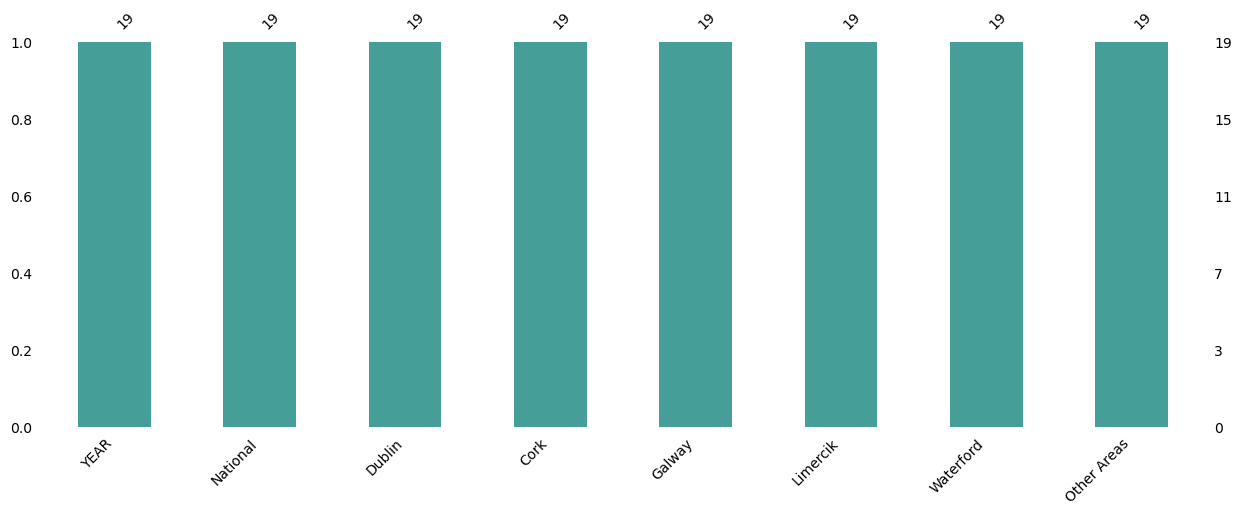

In [21]:
msno.bar(irl,figsize=(15, 5),fontsize=10,color = '#459E97');

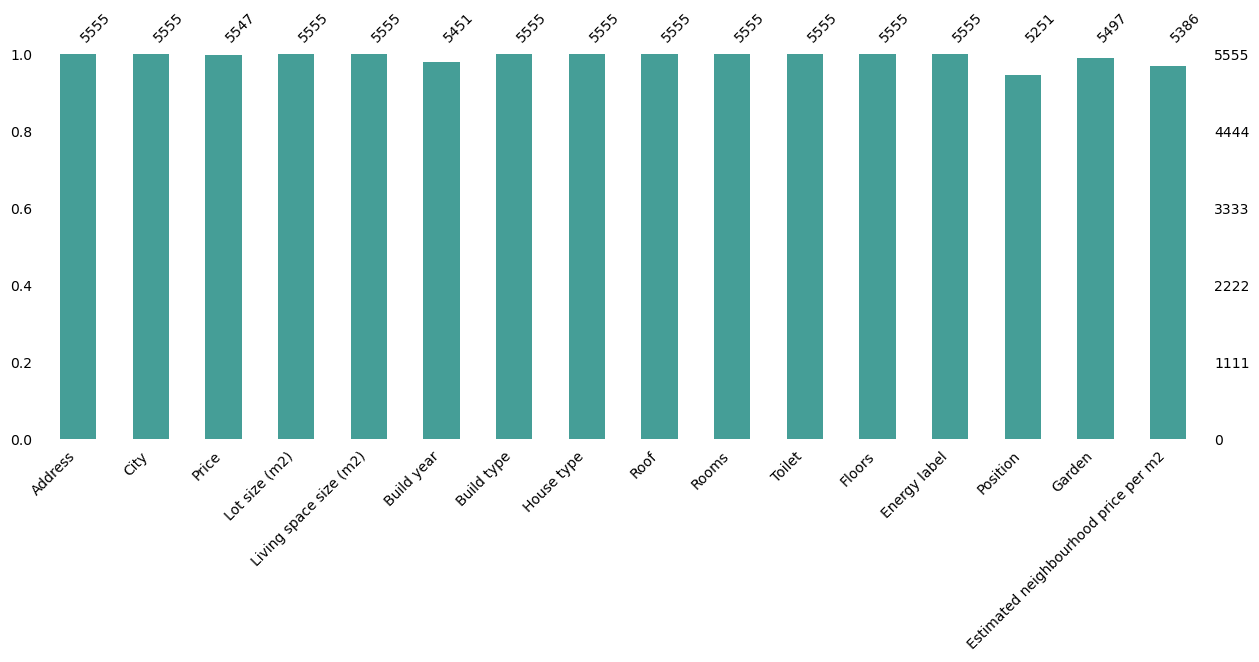

In [22]:
msno.bar(hl,figsize=(15, 5),fontsize=10,color = '#459E97');

Categorical and Numerical Values

In [23]:
# irl 
# categorical 

cat_cols = [col for col in irl.columns if str(irl[col].dtypes) in ["category","object","bool"] ] 

cat_cols

[]

In [24]:
# irl 

# numerical summary 

num_cols = [col for col in irl.columns if irl[col].dtypes in ["int","float"]] 
num_cols

['National', 'Dublin', 'Galway', 'Limercik', 'Waterford', 'Other Areas']

count       19.000
mean    175009.892
std     109988.884
min        220.573
5%         223.279
10%        231.732
20%      61331.014
30%     133438.000
40%     169153.200
50%     194835.000
60%     232844.800
70%     245729.800
80%     261367.400
90%     298933.400
max     320788.000
Name: National, dtype: float64


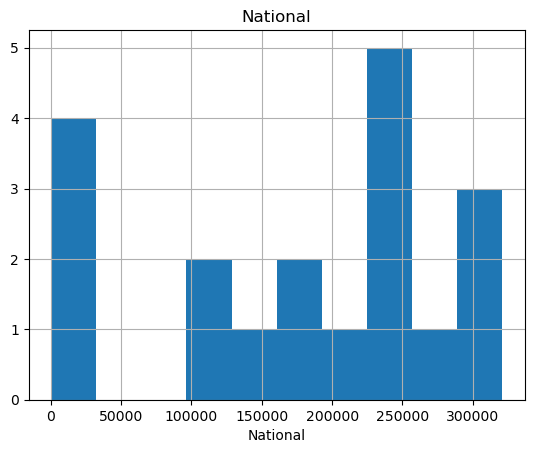

count       19.000
mean    291636.873
std     120208.583
min        339.590
5%      110941.859
10%     152292.600
20%     206636.600
30%     255067.600
40%     292584.400
50%     297294.000
60%     317700.400
70%     339449.400
80%     383326.000
90%     436215.600
max     484926.000
Name: Dublin, dtype: float64


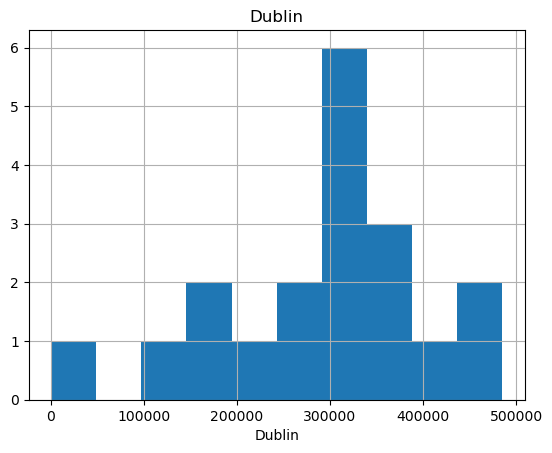

count       19.000
mean    203346.388
std      74547.758
min        239.370
5%      100021.137
10%     117355.200
20%     151587.200
30%     177824.400
40%     218591.400
50%     220351.000
60%     222294.200
70%     236750.200
80%     254999.000
90%     289072.000
max     302208.000
Name: Galway, dtype: float64


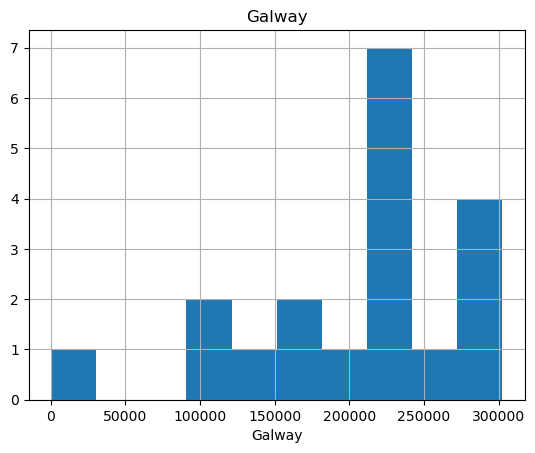

count       19.000
mean    172451.808
std      78989.016
min        278.680
5%         289.471
10%      73046.934
20%     115018.400
30%     149908.800
40%     174432.400
50%     207635.000
60%     212275.600
70%     216387.800
80%     226795.400
90%     238763.600
max     282309.000
Name: Limercik, dtype: float64


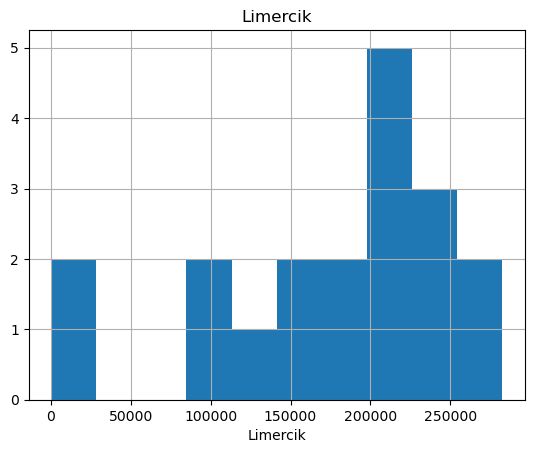

count       19.000
mean    179745.103
std      68055.605
min        294.960
5%       83164.296
10%     105505.600
20%     140056.200
30%     155537.400
40%     171337.400
50%     179716.000
60%     204196.400
70%     216999.800
80%     225745.400
90%     250273.600
max     295397.000
Name: Waterford, dtype: float64


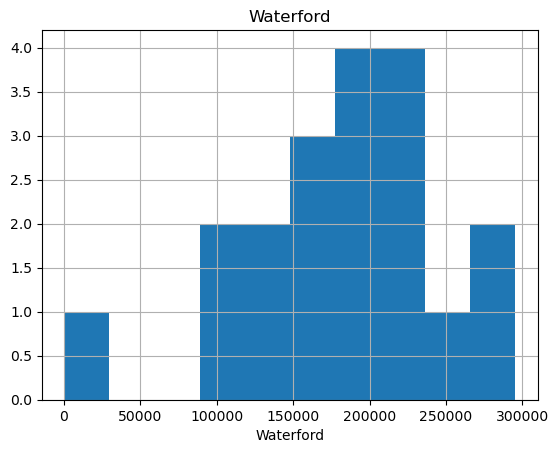

count       19.000
mean    182606.067
std      83292.785
min        210.180
5%         278.508
10%      75770.820
20%     128874.200
30%     159481.800
40%     184674.600
50%     209772.000
60%     217936.600
70%     225799.200
80%     241943.600
90%     260335.200
max     299884.000
Name: Other Areas, dtype: float64


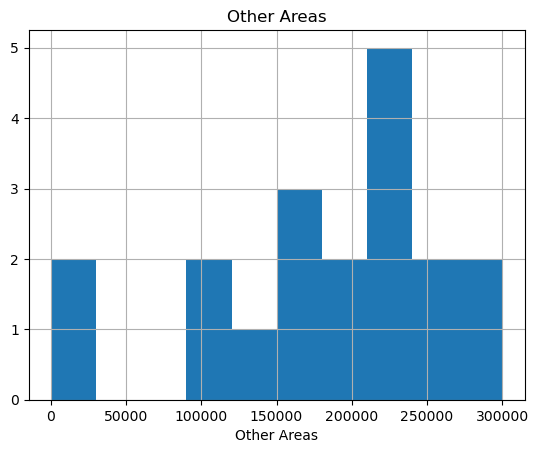

In [25]:
# irl
# numerical summary with visualisation 

def num_summary(dataframe,numerical_col, plot = False):  
    quantiles = [0.05 ,0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90] 
    print(dataframe[numerical_col].describe(quantiles).T) 
    
    if plot: 
        dataframe[numerical_col].hist() 
        plt.xlabel(numerical_col)
        plt.title(numerical_col) 
        plt.show(block=True) 

for col in num_cols: 
    num_summary(irl,col,plot=True)

In [26]:
# categorilcal hl 

cat_cols = [col for col in hl.columns if str(hl[col].dtypes) in ["category","object","bool"] ] 

cat_cols

['Address',
 'City',
 'Build type',
 'House type',
 'Roof',
 'Toilet',
 'Energy label',
 'Position',
 'Garden']

In [27]:
# hl 

# numerical summary 

num_cols = [col for col in hl.columns if hl[col].dtypes in ["int","float"]] 
num_cols

['Price',
 'Lot size (m2)',
 'Living space size (m2)',
 'Build year',
 'Estimated neighbourhood price per m2']

count      5547.000
mean     558578.045
std      354104.369
min      149000.000
5%       260000.000
10%      295000.000
20%      345000.000
30%      380000.000
40%      425000.000
50%      469000.000
60%      525000.000
70%      595000.000
80%      695000.000
90%      895000.000
max     4700000.000
Name: Price, dtype: float64


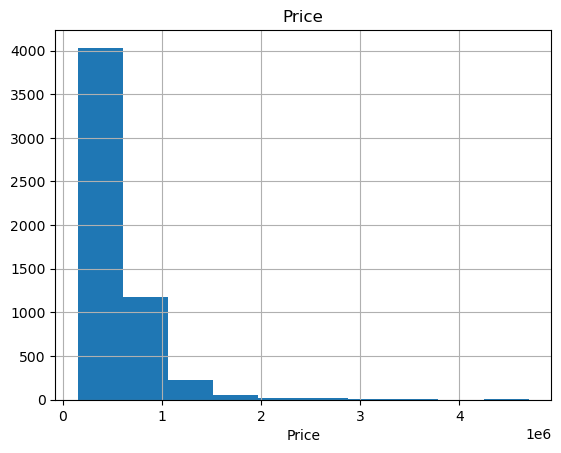

count   5555.000
mean     256.154
std      201.597
min        1.000
5%         2.114
10%       61.000
20%      123.000
30%      143.000
40%      163.000
50%      197.000
60%      237.000
70%      286.000
80%      380.000
90%      551.000
max      998.000
Name: Lot size (m2), dtype: float64


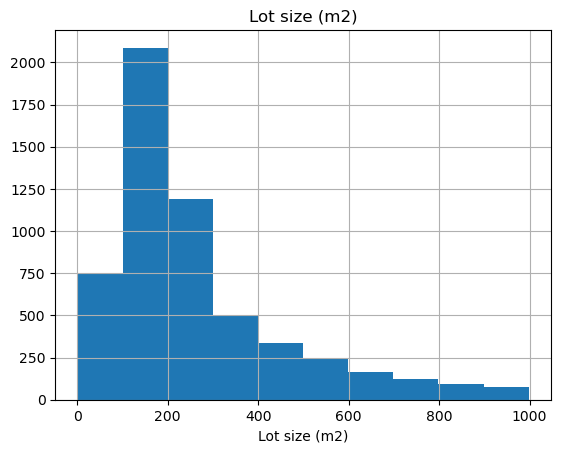

count   5555.000
mean     146.434
std       62.286
min       53.000
5%        85.000
10%       94.000
20%      106.000
30%      114.000
40%      122.000
50%      130.000
60%      140.000
70%      154.000
80%      173.000
90%      216.000
max      844.000
Name: Living space size (m2), dtype: float64


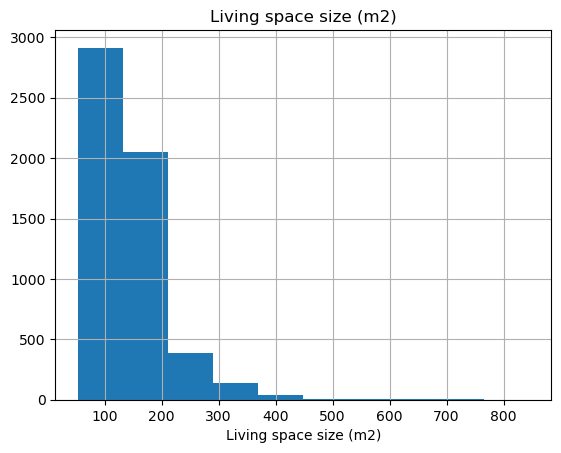

count   5451.000
mean    1969.232
std       39.995
min     1500.000
5%      1906.000
10%     1925.000
20%     1938.000
30%     1962.000
40%     1970.000
50%     1976.000
60%     1984.000
70%     1992.000
80%     1999.000
90%     2007.000
max     2022.000
Name: Build year, dtype: float64


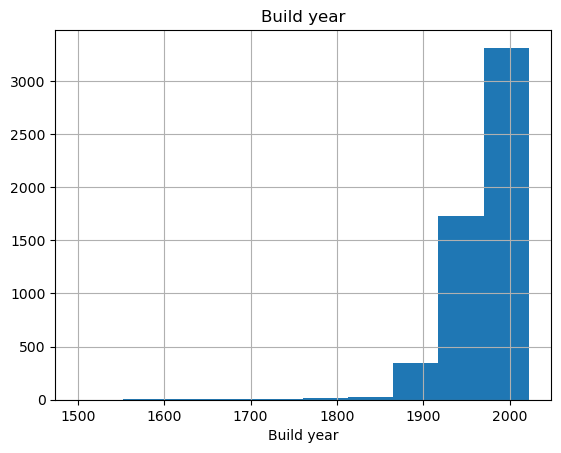

count    5386.000
mean     3135.079
std      2793.352
min        15.000
5%        420.000
10%       705.000
20%      1130.000
30%      1510.000
40%      1965.000
50%      2420.000
60%      2980.000
70%      3685.000
80%      4610.000
90%      6225.000
max     29775.000
Name: Estimated neighbourhood price per m2, dtype: float64


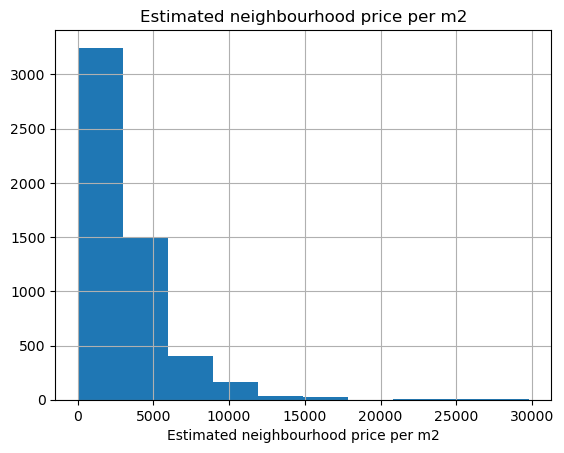

In [28]:
# hl

# numerical summary with visualisation 

def num_summary(dataframe,numerical_col, plot = False):  
    quantiles = [0.05 ,0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90] 
    print(dataframe[numerical_col].describe(quantiles).T) 
    
    if plot: 
        dataframe[numerical_col].hist() 
        plt.xlabel(numerical_col)
        plt.title(numerical_col) 
        plt.show(block=True) 

for col in num_cols: 
    num_summary(hl,col,plot=True)

Compare City

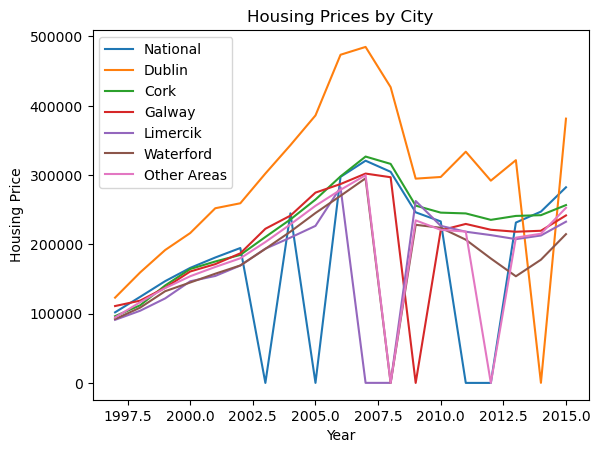

In [29]:
# irl 

# Create a line chart to compare the prices of each city over the years
plt.plot(irl['YEAR'], irl['National'], label='National')
plt.plot(irl['YEAR'], irl['Dublin'], label='Dublin')
plt.plot(irl['YEAR'], irl['Cork'], label='Cork')
plt.plot(irl['YEAR'], irl['Galway'], label='Galway')
plt.plot(irl['YEAR'], irl['Limercik'], label='Limercik')
plt.plot(irl['YEAR'], irl['Waterford'], label='Waterford')
plt.plot(irl['YEAR'], irl['Other Areas'], label='Other Areas')

# Add a legend and axis labels
plt.legend()
plt.xlabel('Year')
plt.ylabel('Housing Price')
plt.title('Housing Prices by City')

# Show the plot
plt.show()

In [30]:
# Find the unique types of cities in the dataset
city_types = hl['City'].unique()

# Print the unique city types
print(city_types)

['Sint Pancras' 'Waddinxveen' 'Houten' ... 'Cadzand' 'Woudsend' 'Bitgum']


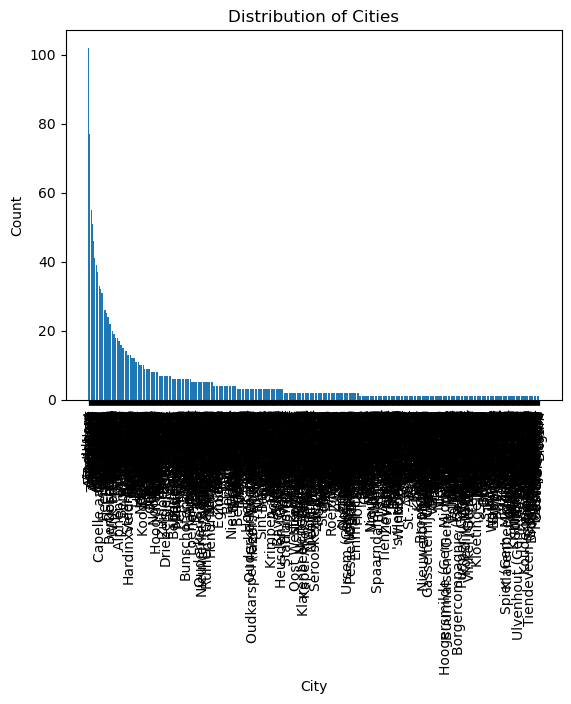

In [31]:
# Count the number of occurrences of each city
city_counts = hl['City'].value_counts()

# Create a bar plot for the city counts
plt.bar(city_counts.index, city_counts.values)

# Customize the plot
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Cities')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()


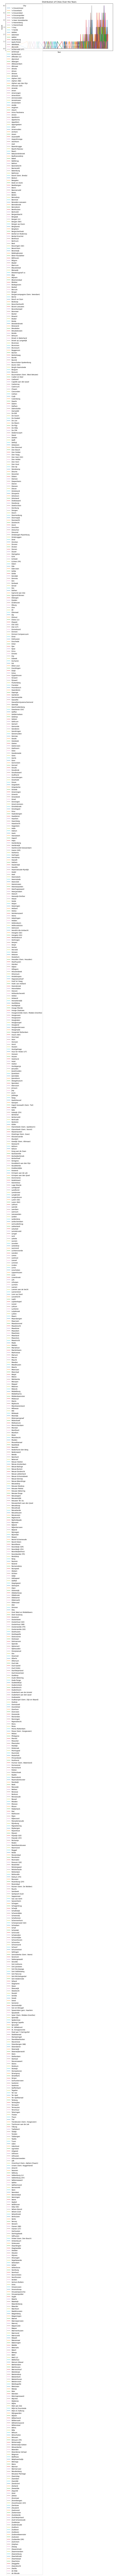

In [32]:

# Convert Build year column to datetime type
hl['Build year'] = pd.to_datetime(hl['Build year'])

# Group by Build year and count the occurrences of each city
city_counts_by_year = hl.groupby('Build year')['City'].value_counts().unstack().fillna(0)

# Plotting line graph for each city
city_counts_by_year.plot(kind='line', figsize=(12, 6))

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Cities Over the Years')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [33]:
hl.isnull().sum()

Address                                   0
City                                      0
Price                                     8
Lot size (m2)                             0
Living space size (m2)                    0
Build year                              104
Build type                                0
House type                                0
Roof                                      0
Rooms                                     0
Toilet                                    0
Floors                                    0
Energy label                              0
Position                                304
Garden                                   58
Estimated neighbourhood price per m2    169
dtype: int64

In [34]:
# Let's delete the ones we don't need from the dataset.
hl.drop('Address', axis = 1, inplace=True) 
hl.drop('Lot size (m2)', axis = 1, inplace=True) 
hl.drop('Build type', axis=1, inplace = True) 
hl.drop('House type', axis = 1, inplace =True) 
hl.drop('Roof', axis = 1, inplace = True) 
hl.drop('Toilet', axis = 1, inplace=True) 
hl.drop('Floors', axis=1, inplace = True) 
hl.drop('Energy label', axis=1, inplace = True) 
hl.drop('Position', axis=1, inplace = True)  
hl.drop('Garden', axis=1, inplace = True) 

In [35]:
hl.drop('Rooms', axis=1, inplace = True)

In [36]:
hl.drop('Estimated neighbourhood price per m2', axis=1, inplace = True)

In [37]:
hl.drop('Living space size (m2)', axis=1, inplace = True)

In [38]:
hl.head()

City       Price                    Build year
0  Sint Pancras  525000.000 1970-01-01 00:00:00.000001972
1   Waddinxveen  425000.000 1970-01-01 00:00:00.000001935
2        Houten  575000.000 1970-01-01 00:00:00.000001986
3     Pannerden  259500.000 1970-01-01 00:00:00.000001989
4    Sassenheim 1050000.000 1970-01-01 00:00:00.000002000

# Statistics for DA

In [39]:
# irl 

irl.describe()

YEAR   National     Dublin       Cork     Galway   Limercik  Waterford  Other Areas
count   19.000     19.000     19.000     19.000     19.000     19.000     19.000       19.000
mean  2006.000 175009.892 291636.873 223630.263 203346.388 172451.808 179745.103   182606.067
std      5.627 109988.884 120208.583  63859.395  74547.758  78989.016  68055.605    83292.785
min   1997.000    220.573    339.590  96504.000    239.370    278.680    294.960      210.180
25%   2001.500 113202.500 234312.500 180128.000 166275.000 134492.000 149569.000   145586.000
50%   2006.000 194835.000 297294.000 241127.000 220351.000 207635.000 179716.000   209772.000
75%   2010.500 246821.000 362367.500 256372.500 241690.000 222557.000 221234.000   231835.000
max   2015.000 320788.000 484926.000 326765.000 302208.000 282309.000 295397.000   299884.000

In [40]:
# hl 

hl.describe()

Price
count    5547.000
mean   558578.045
std    354104.369
min    149000.000
25%    365000.000
50%    469000.000
75%    645000.000
max   4700000.000

Mean, Median and Standard Deviation

In [41]:
mean_values = irl.iloc[:, 1:].mean()
std_values = irl.iloc[:, 1:].std()
median_values = irl.iloc[:, 1:].median()

print("Mean values:")
print(mean_values)
print("\nStandard deviation values:")
print(std_values)
print("\nMedian values:")
print(median_values)

Mean values:
National      175009.892
Dublin        291636.873
Cork          223630.263
Galway        203346.388
Limercik      172451.808
Waterford     179745.103
Other Areas   182606.067
dtype: float64

Standard deviation values:
National      109988.884
Dublin        120208.583
Cork           63859.395
Galway         74547.758
Limercik       78989.016
Waterford      68055.605
Other Areas    83292.785
dtype: float64

Median values:
National      194835.000
Dublin        297294.000
Cork          241127.000
Galway        220351.000
Limercik      207635.000
Waterford     179716.000
Other Areas   209772.000
dtype: float64


In [42]:

mean_values = hl.iloc[:, 1:].mean()
std_values = hl.iloc[:, 1:].std()
median_values = hl.iloc[:, 1:].median()

print("Mean values:")
print(mean_values)
print("\nStandard deviation values:")
print(std_values)
print("\nMedian values:")
print(median_values)

Mean values:
Price   558578.045
dtype: float64

Standard deviation values:
Price                        354104.369
Build year    0 days 00:00:00.000000039
dtype: object

Median values:
Price   469000.000
dtype: float64


C:\Users\TOLGA BOROĞLU\AppData\Local\Temp\ipykernel_19216\546198376.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean_values = hl.iloc[:, 1:].mean()
C:\Users\TOLGA BOROĞLU\AppData\Local\Temp\ipykernel_19216\546198376.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  median_values = hl.iloc[:, 1:].median()


T-test

In [43]:
irl.head()

YEAR   National     Dublin    Cork     Galway   Limercik  Waterford  Other Areas
0  1997 102037.000 123231.000   96504 111108.000  91236.000  92372.000    94642.000
1  1998 124368.000 159558.000  112166 118917.000 104327.000 108789.000   116639.000
2  1999 147043.000 191942.000  140797 137510.000 122146.000 132510.000   137031.000
3  2000 166155.000 216433.000  164535 160972.000 146838.000 145087.000   154141.000
4  2001 181146.000 252192.000  175372 171578.000 154515.000 157767.000   167493.000

In [44]:
hl.head()

City       Price                    Build year
0  Sint Pancras  525000.000 1970-01-01 00:00:00.000001972
1   Waddinxveen  425000.000 1970-01-01 00:00:00.000001935
2        Houten  575000.000 1970-01-01 00:00:00.000001986
3     Pannerden  259500.000 1970-01-01 00:00:00.000001989
4    Sassenheim 1050000.000 1970-01-01 00:00:00.000002000

In [45]:
# STATISTICS 
import scipy.stats as stats
from scipy.stats import ttest_1samp  
from scipy.stats import ttest_ind 
from scipy.stats import wilcoxon
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, levene, kruskal
from scipy.stats import f_oneway
import geopandas as gpd

In [46]:
# irl

# Perform t-test between 'National' and 'Dublin' columns
national_values = irl['National']
dublin_values = irl['Dublin']
t_statistic, p_value = ttest_ind(national_values, dublin_values)

# Print the t-statistic and p-value
print("T-Statistic: ", t_statistic)
print("P-Value: ", p_value)

T-Statistic:  -3.1200584198729735
P-Value:  0.003551877535326691


In [47]:
# hl 

# Convert 'Build year' column to datetime
hl['Build year'] = pd.to_datetime(hl['Build year'])

# Split the DataFrame into two groups based on 'City'
group1 = hl[hl['City'] == 'Sint Pancras']['Price']
group2 = hl[hl['City'] == 'Waddinxveen']['Price']

# Perform t-test between the two groups
t_statistic, p_value = ttest_ind(group1, group2)

# Print the t-statistic and p-value
print("T-Statistic: ", t_statistic)
print("P-Value: ", p_value)

T-Statistic:  1.5298431552512572
P-Value:  0.17692772929597267


Wicoxon Test

In [48]:
# irl 

irl = pd.DataFrame(irl)

# Perform the Wilcoxon signed-rank test
statistic, p_value = wilcoxon(irl['National'], irl['Dublin'])

# Print the results
print(f"Wilcoxon statistic: {statistic}")
print(f"p-value: {p_value}")

Wilcoxon statistic: 15.0
p-value: 0.000522613525390625


In [49]:
# hl 


# Convert 'Build year' column to datetime
hl['Build year'] = pd.to_datetime(hl['Build year'])

# Perform Wilcoxon signed-rank test with ties handled
statistic, p_value = wilcoxon(hl['Price'], zero_method='wilcox', alternative='two-sided', correction=True)

# Print the test statistic and p-value
print("Test Statistic: ", statistic)
print("P-Value: ", p_value)

Test Statistic:  nan
P-Value:  nan


Chi-square test

In [50]:

# irl 
# national and dublin 

# Create a contingency table with observed frequencies
observed = np.array([[102037.0, 124368.0], [123231.0, 159558.0]])

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(observed)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square statistic: 113.30459015923151
P-value: 1.8504838210093205e-26
Degrees of freedom: 1
Expected frequencies:
 [[100161.82739781 126243.17260219]
 [125106.17260219 157682.82739781]]


In [51]:
hl.head()

City       Price                    Build year
0  Sint Pancras  525000.000 1970-01-01 00:00:00.000001972
1   Waddinxveen  425000.000 1970-01-01 00:00:00.000001935
2        Houten  575000.000 1970-01-01 00:00:00.000001986
3     Pannerden  259500.000 1970-01-01 00:00:00.000001989
4    Sassenheim 1050000.000 1970-01-01 00:00:00.000002000

In [52]:
# hl 
# price 


# Create a contingency table with observed frequencies
observed = np.array([[525000.0, 425000.0], [575000.0, 259500.0]])

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(observed)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square statistic: 34957.949575798346
P-value: 0.0
Degrees of freedom: 1
Expected frequencies:
 [[585598.20678061 364401.79321939]
 [514401.79321939 320098.20678061]]


Variance Analysis 

In [53]:
def variance_analysis(dataframe):
    # Calculate the variance for each column (month/year)
    variances = dataframe.var()

    # Drop any columns that contain NaN values
    variances = variances.dropna()

    # Perform ANOVA on the remaining columns
    f_statistic, p_value = f_oneway(*[dataframe[col] for col in variances.index])

    # Return the results as a dictionary
    results = {
        'variances': variances,
        'f_statistic': f_statistic,
        'p_value': p_value
    }

    return results

In [54]:
# irl

# Perform variance analysis
results = variance_analysis(irl)

# Print the results
print("Variances:")
print(results['variances'])
print("\nF-Statistic:", results['f_statistic'])
print("p-value:", results['p_value']) 

Variances:
YEAR                   31.667
National      12097554531.890
Dublin        14450103471.967
Cork           4078022354.871
Galway         5557368266.617
Limercik       6239264681.749
Waterford      4631565432.100
Other Areas    6937688046.578
dtype: float64

F-Statistic: 18.769944950919687
p-value: 1.2205277159936643e-17


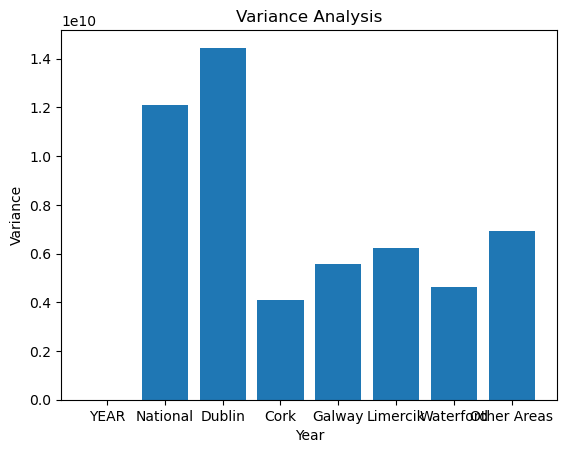

In [55]:
# visualisation
# irl
# Calculate the variance for each column (year)
variances = irl.var()

# Drop any columns that contain NaN values
variances = variances.dropna()

# Plot the variances using a bar plot
plt.bar(variances.index, variances.values)
plt.xlabel('Year')
plt.ylabel('Variance')
plt.title('Variance Analysis')
plt.show()

In [56]:
hl = pd.read_csv("holland.csv")

In [57]:
# Let's delete the ones we don't need from the dataset.
hl.drop('Address', axis = 1, inplace=True) 
hl.drop('Lot size (m2)', axis = 1, inplace=True) 
hl.drop('Build type', axis=1, inplace = True) 
hl.drop('House type', axis = 1, inplace =True) 
hl.drop('Roof', axis = 1, inplace = True) 
hl.drop('Toilet', axis = 1, inplace=True) 
hl.drop('Floors', axis=1, inplace = True) 
hl.drop('Energy label', axis=1, inplace = True) 
hl.drop('Position', axis=1, inplace = True)  
hl.drop('Garden', axis=1, inplace = True)  
hl.drop('Rooms', axis=1, inplace = True) 


In [58]:
hl.drop('Living space size (m2)', axis=1, inplace = True) 

In [59]:
hl.drop('Estimated neighbourhood price per m2', axis=1, inplace = True) 

In [60]:
# Find unique values and make dict
def unique_vals(column):
    """
    Function that creates a dictionary of unique values and corresponding unique numerical values.
    
    Input: column - Pandas DataSeries of 1 column
    Output: value_dict - Dictionary of unique column values and unique numerical values
    """
    unique_values = column.unique()
    vals = np.arange(0,len(unique_values))
    value_dict = dict(zip(unique_values, vals))
    return value_dict
# Remove characters

hl['Price'] = hl['Price'].str.replace("€ ","") 


In [61]:
hl.head()

City      Price Build year
0  Sint Pancras    525.000       1972
1   Waddinxveen    425.000       1935
2        Houten    575.000       1986
3     Pannerden    259.500       1989
4    Sassenheim  1.050.000       2000

In [62]:
hl.dtypes

City          object
Price         object
Build year    object
dtype: object

In [63]:
# Remove any leading or trailing whitespace from the 'Price' column
hl['Price'] = hl['Price'].str.strip()

# Replace any non-numeric values in the 'Price' column with NaN
hl['Price'] = pd.to_numeric(hl['Price'], errors='coerce')

# Convert the 'Price' column to float
hl['Price'] = hl['Price'].astype(float)

In [64]:
hl

City   Price Build year
0                           Sint Pancras 525.000       1972
1                            Waddinxveen 425.000       1935
2                                 Houten 575.000       1986
3                              Pannerden 259.500       1989
4                             Sassenheim     NaN       2000
5                              Oudewater 445.000       2016
6                                Utrecht 425.000       1984
7                              Dordrecht 825.000       1974
8                               Zuidveen 249.500       1920
9                             Amstelveen 550.000       1992
10                            Nieuwlande 859.000       2017
11                                 Rhoon 389.000       1973
12                                   Ede 349.000        NaN
13                            Terheijden 399.000       1976
14                               Schaijk 495.000       1988
15                           Nieuwleusen 560.000       1967
16                                Linden 425.000       1965
17                                Ermelo 415.000       1974
18                                Veghel 310.000       2012
19                            Veenendaal 525.000       1990
20                                Holten 289.000       1963
21                               Helmond 385.000       2017
22                                 Gilze 325.000       2009
23                            Assendelft 485.000       2008
24                                Nuenen 335.000       2009
25                             Apeldoorn 315.000       1971
26                                 Linne 675.000       1976
27                                Arnhem 275.000       1984
28                             Eindhoven 595.000       1953
29                              Hillegom 389.000       1920
30                        's-Gravenzande 450.000       1978
31                               Nijkerk 275.000       1988
32                             Gorinchem 540.000       1994
33                           Spijkenisse 525.000       1987
34                             Purmerend 389.000       1985
35                              Nijmegen 275.000       1968
36                                Almere 325.000       1996
37                        St. Willebrord 825.000       2012
38                               Rijssen 359.000       1952
39                              Delfzijl 165.000       1981
40                        Surhuisterveen 375.000       2022
41                       Oosterhout (NB) 450.000       1999
42                               Tegelen 615.000       2001
43                       Oosterhout (NB) 420.000       2018
44                                Hoeven 425.000       1967
45                           Lage Mierde 300.000       2005
46                   Alphen aan den Rijn 650.000       1989
47                                   Oss 289.000       1960
48                            Sliedrecht 299.000       1925
49                                Almere 385.000       1980
50                               Wanroij 425.000       1965
51                            Leeuwarden 267.500       1979
52                              Lelystad 315.000       1981
53                              Kesteren 545.000       2020
54                              Den Haag 945.000       1998
55                          Nieuw Heeten 325.000       1976
56                            Oisterwijk 462.500       1970
57                                 Emmen 425.000       1949
58                            Maasbommel 395.000       1926
59                                Venray 249.000       1981
60                               Zaandam 599.000       1995
61                                  Emst 425.000       1952
62                             Castricum 399.000       1915
63                        Middenbeemster 979.000       1988
64                                 Breda 325.000       1968
65                            Sliedrecht     NaN       1890
66              

In [65]:
# Find the unique types of cities in the dataset
city_types = hl['Build year'].unique()

# Print the unique city types
print(city_types)

['1972' '1935' '1986' '1989' '2000' '2016' '1984' '1974' '1920' '1992'
 '2017' '1973' nan '1976' '1988' '1967' '1965' '2012' '1990' '1963' '2009'
 '2008' '1971' '1953' '1978' '1994' '1987' '1985' '1968' '1996' '1952'
 '1981' '2022' '1999' '2001' '2018' '2005' '1960' '1925' '1980' '1979'
 '2020' '1998' '1970' '1949' '1926' '1995' '1915' '1890' '1966' '1962'
 '1934' '2010' '1964' '1933' '1997' '1982' '2004' '1941' '1991' '1969'
 '1930' '2015' '1977' '1961' '1936' '1932' '1955' '1983' '2002' '1917'
 '1975' '1950' '2006' '1923' '1906' '1938' '1931' '1954' '1871' '2019'
 '2003' '1922' '1993' '1948' '2021' '1924' '1919' '1910' '1959' '1927'
 '1958' '1900' '1850' '1911' '2011' '1905' '2014' '1956' 'Voor 1906'
 '1937' '1903' '1792' '1875' '1957' '1940' '1947' '2007' '1876' '1929'
 '1951' '1883' '1840' '1892' '1884' '1916' '1939' '1946' '1904' '1942'
 '1860' '1913' '1928' '1898' '1909' '1895' '1945' '2013' '1610' '1918'
 '1921' 'Na 2020' '1880' '1885' '1800' '1790' '1887' '1722' '1642' '1897'
 

In [66]:
# variance analysis 

# hl 

from scipy.stats import f_oneway

# Variance analysis
def variance_analysis(hl):
    variances = {}
    for column in hl.columns:
        if hl[column].dtype != object:  # Exclude non-numeric columns
            variances[column] = hl[column].var()

    numeric_columns = hl.select_dtypes(include=[int, float]).columns
    if len(numeric_columns) > 1:
        f_statistic, p_value = f_oneway(*hl[numeric_columns].values.T)
    else:
        f_statistic, p_value = None, None
    
    return {'variances': variances, 'f_statistic': f_statistic, 'p_value': p_value}

# Perform variance analysis on the DataFrame
results = variance_analysis(hl)

# Print the results
print("Variances:")
print(results['variances'])
print("\nF-Statistic:", results['f_statistic'])
print("p-value:", results['p_value']) 


Variances:
{'Price': 31950.66861135549}

F-Statistic: None
p-value: None


Correlation

<Axes: >

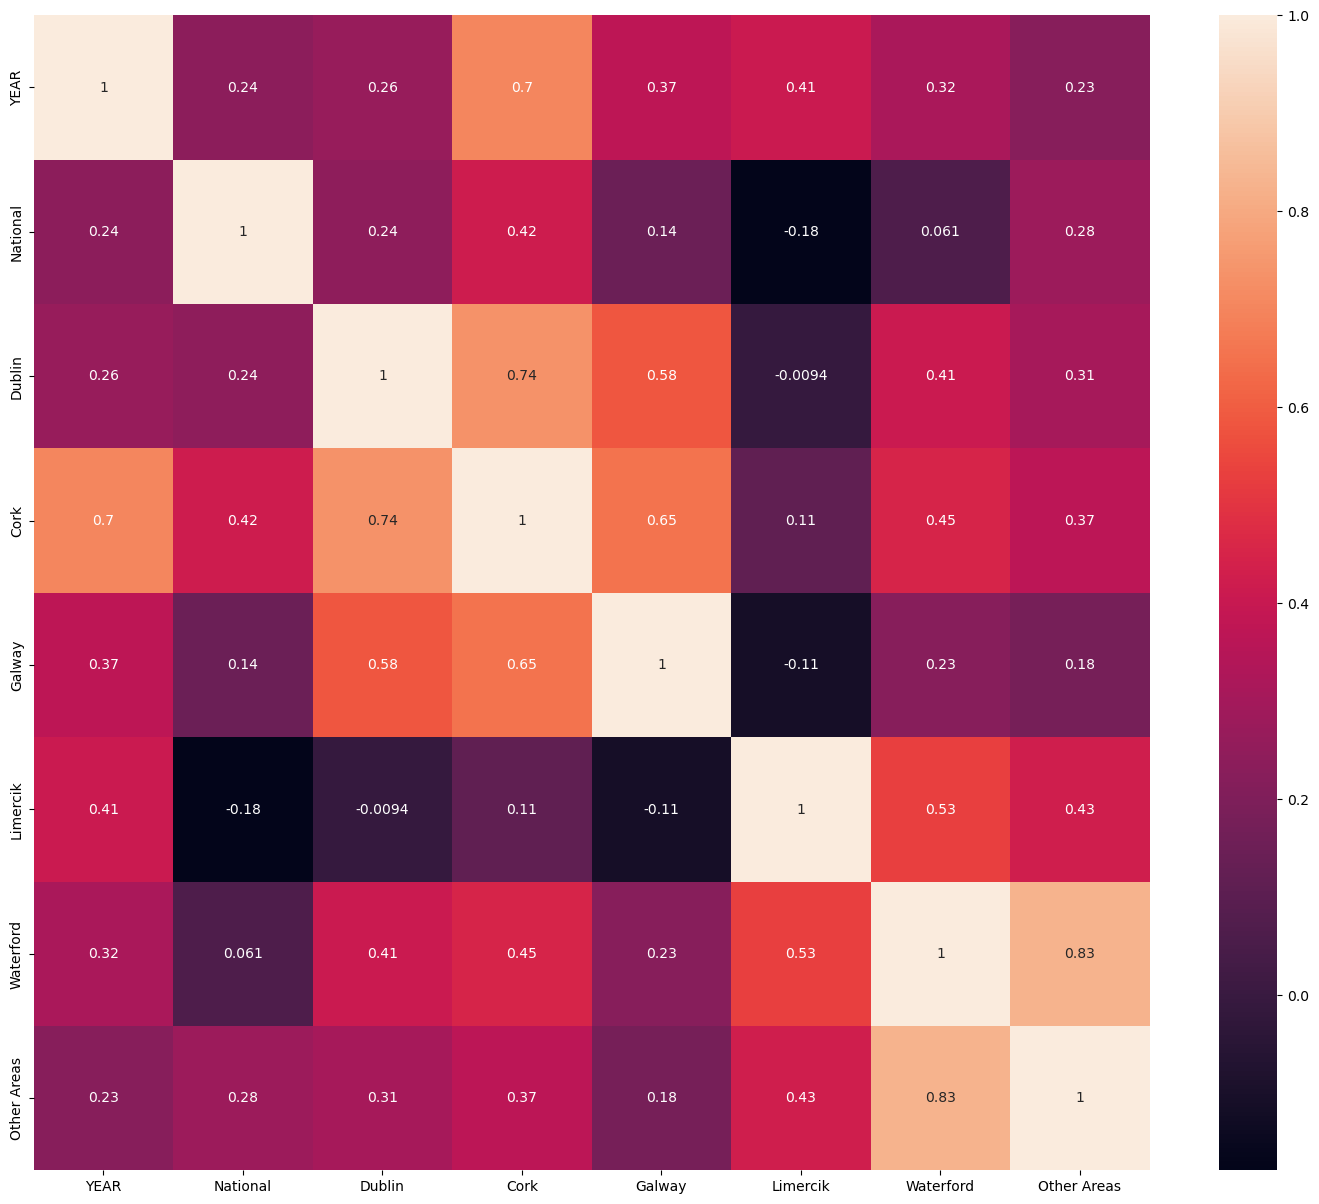

In [67]:

# correlation 
# irl 

plt.figure(figsize=(18,15))
sns.heatmap(data=irl.corr(), annot=True)

C:\Users\TOLGA BOROĞLU\AppData\Local\Temp\ipykernel_19216\3649317611.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=hl.corr(), annot=True)


<Axes: >

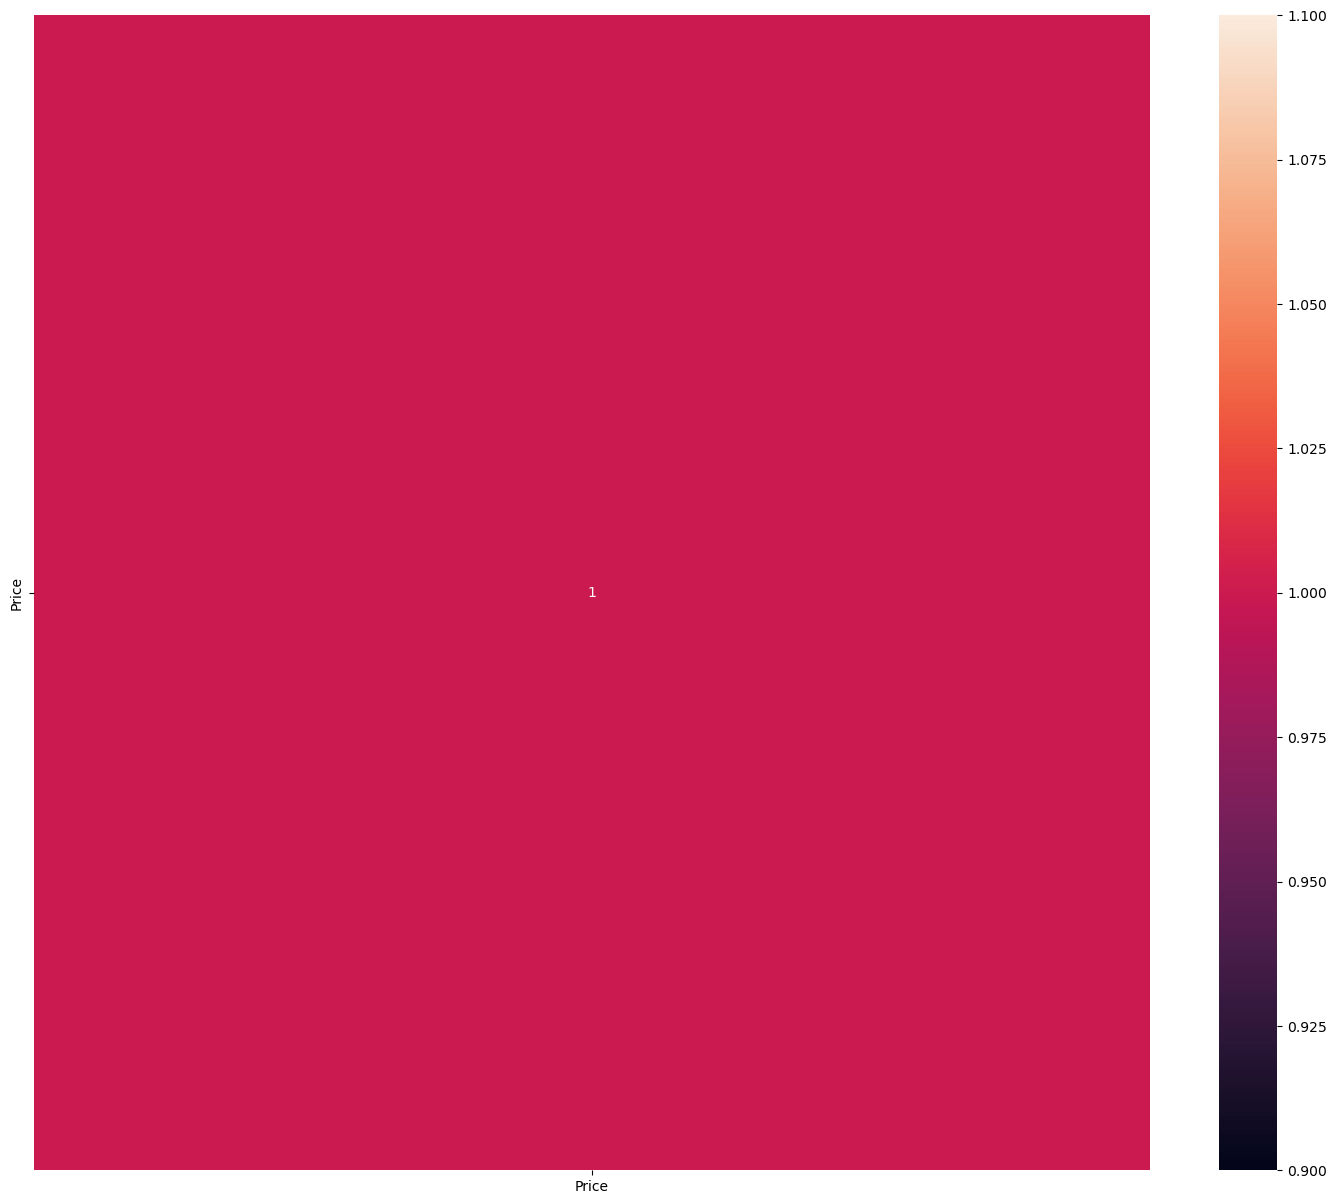

In [68]:
# correlation 

# hl 

plt.figure(figsize=(18,15))
sns.heatmap(data=hl.corr(), annot=True)

Geographical

In [69]:
eu

COU                       Country          IND                          Indicator     TIME     Time Unit Code    Unit  PowerCode Code PowerCode  Reference Period Code  Reference Period   Value  Flag Codes  Flags
0      HUN                       Hungary      HPI_RPI                Price to rent ratio  2019-Q3  Q3-2019       IDX   Index               0     Units                    NaN               NaN 137.001         NaN    NaN
1      HUN                       Hungary      HPI_RPI                Price to rent ratio  2019-Q4  Q4-2019       IDX   Index               0     Units                    NaN               NaN 136.499         NaN    NaN
2      HUN                       Hungary      HPI_RPI                Price to rent ratio  2020-Q1  Q1-2020       IDX   Index               0     Units                    NaN               NaN 134.115         NaN    NaN
3      HUN                       Hungary      HPI_RPI                Price to rent ratio  2020-Q2  Q2-2020       IDX   Index               0     Units                    NaN               NaN 133.858         NaN    NaN
4      HUN                       Hungary      HPI_RPI                Price to rent ratio  2020-Q3  Q3-2020       IDX   Index               0     Units                    NaN               NaN 140.043         NaN    NaN
5      HUN                       Hungary      HPI_RPI                Price to rent ratio  2020-Q4  Q4-2020       IDX   Index               0     Units                    NaN               NaN 142.053         NaN    NaN
6      HUN                       Hungary      HPI_RPI                Price to rent ratio  2021-Q1  Q1-2021       IDX   Index               0     Units                    NaN               NaN 148.847         NaN    NaN
7      HUN                       Hungary      HPI_RPI                Price to rent ratio  2021-Q2  Q2-2021       IDX   Index               0     Units                    NaN               NaN 154.142         NaN    NaN
8      HUN                       Hungary      HPI_RPI                Price to rent ratio  2021-Q3  Q3-2021       IDX   Index               0     Units                    NaN               NaN 159.057         NaN    NaN
9      HUN                       Hungary      HPI_RPI                Price to rent ratio  2021-Q4  Q4-2021       IDX   Index               0     Units                    NaN               NaN 166.348         NaN    NaN
10     HUN                       Hungary      HPI_RPI                Price to rent ratio  2022-Q1  Q1-2022       IDX   Index               0     Units                    NaN               NaN 171.432         NaN    NaN
11     HUN                       Hungary      HPI_RPI                Price to rent ratio  2022-Q2  Q2-2022       IDX   Index               0     Units                    NaN               NaN 176.304         NaN    NaN
12     HUN                       Hungary      HPI_RPI                Price to rent ratio  2022-Q3  Q3-2022       IDX   Index               0     Units                    NaN               NaN 175.355         NaN    NaN
13     HUN                       Hungary      HPI_RPI                Price to rent ratio  2022-Q4  Q4-2022       IDX   Index               0     Units                    NaN               NaN 170.413         NaN    NaN
14     CAN                        Canada  HPI_YDH_AVG    Standardised price-income ratio  2019-Q3  Q3-2019         1  RATIOS               0     Units                    NaN               NaN 144.174         NaN    NaN
15     CAN                        Canada  HPI_YDH_AVG    Standardised price-income ratio  2019-Q4  Q4-2019         1  RATIOS               0     Units                    NaN               NaN 145.320         NaN    NaN
16     CAN                        Canada  HPI_YDH_AVG    Standardised price-income ratio  2020-Q1  Q1-2020         1  RATIOS               0     Units                    NaN               NaN 147.255         NaN    NaN
17     CAN                        Canada  HPI_YDH_AVG    Standard

C:\Users\TOLGA BOROĞLU\AppData\Local\Temp\ipykernel_19216\826488272.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


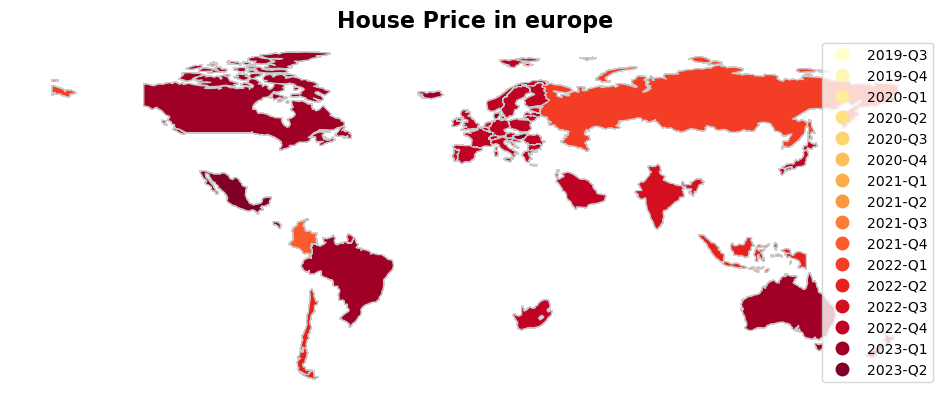

In [70]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged = world.merge(pd.DataFrame(eu), left_on='name', right_on='Country', how='left')
fig, ax = plt.subplots(figsize=(12, 8))
merged.plot(column='TIME', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('House Price in europe', fontdict={'fontsize': '16', 'fontweight': 'bold'})
ax.axis('off')

# Show the plot
plt.show()

In [71]:
# hl null value add mean 

hl = hl.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0).head()

In [72]:
hl.isnull().sum()

City          0
Price         0
Build year    0
dtype: int64

In [73]:
hl

City   Price Build year
0  Sint Pancras 525.000       1972
1   Waddinxveen 425.000       1935
2        Houten 575.000       1986
3     Pannerden 259.500       1989
4    Sassenheim 487.979       2000

In [74]:
# Convert 'Build year' column to int
hl['Build year'] = pd.to_numeric(hl['Build year'], errors='coerce').astype(int)

In [75]:
hl.dtypes

City           object
Price         float64
Build year      int32
dtype: object

In [76]:
hl

City   Price  Build year
0  Sint Pancras 525.000        1972
1   Waddinxveen 425.000        1935
2        Houten 575.000        1986
3     Pannerden 259.500        1989
4    Sassenheim 487.979        2000

One Hot Encoding

In [77]:
from sklearn.preprocessing import OneHotEncoder
ohe= OneHotEncoder()

hl = pd.get_dummies(hl,columns=["City"], drop_first=True).head()

In [78]:
hl

Price  Build year  City_Pannerden  City_Sassenheim  City_Sint Pancras  City_Waddinxveen
0 525.000        1972               0                0                  1                 0
1 425.000        1935               0                0                  0                 1
2 575.000        1986               0                0                  0                 0
3 259.500        1989               1                0                  0                 0
4 487.979        2000               0                1                  0                 0

Standard Scaler 

In [79]:
from sklearn.preprocessing import StandardScaler


# irl 

# standard scale all columns except the "Response" column
columns_to_scale = [col for col in irl.columns if col != "Response"]

# create a StandardScaler object
scaler = StandardScaler()

# fit and transform the data
irl[columns_to_scale] = scaler.fit_transform(irl[columns_to_scale])

In [80]:
# hl 

# standard scale all columns except the "Response" column
columns_to_scale = [col for col in hl.columns if col != "Response"]

# create a StandardScaler object
scaler = StandardScaler()

# fit and transform the data
hl[columns_to_scale] = scaler.fit_transform(hl[columns_to_scale])

# Machine Learning

### Linear Regression

Ireland

National

In [83]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix 
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

In [81]:
X = irl.drop('National',axis=1).values
y = irl['National'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (15, 7)
Size of y_train :  (15, 1)
Size of X_test :  (4, 7)
Size of Y_test :  (4, 1)


In [84]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

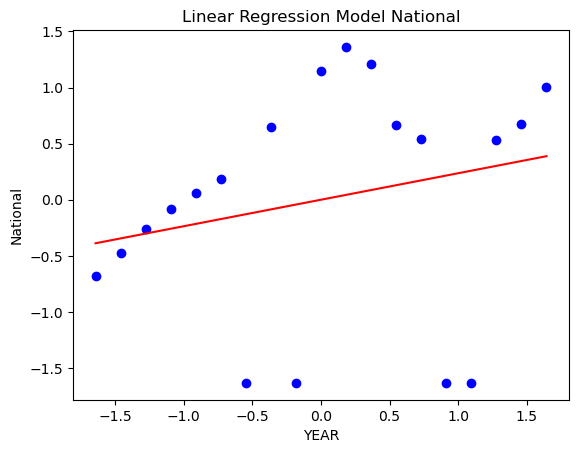

In [86]:
# Split the data into features (X) and target (y)
X = irl[['YEAR']]
y = irl['National']

# Create an instance of the LinearRegression class
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Make predictions using the model
predictions = model.predict(X)

# Plot the data and the model predictions
plt.scatter(X, y, c='blue')
plt.plot(X, predictions, c='red')
plt.xlabel('YEAR')
plt.ylabel('National')
plt.title('Linear Regression Model National')
plt.show()

In [87]:
cv_linear_reg = cross_val_score(estimator = linear_reg, X = X, y = y, cv = 5)

y_pred_linear_reg_train = linear_reg.predict(X_train)
r2_score_linear_reg_train = r2_score(y_train, y_pred_linear_reg_train)

y_pred_linear_reg_test = linear_reg.predict(X_test)
r2_score_linear_reg_test = r2_score(y_test, y_pred_linear_reg_test)

rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_reg_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_linear_reg.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_linear_reg_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_linear_reg_test))
print('RMSE : {0:.3f}'.format(rmse_linear))

CV Linear Regression : -3.445
R2_score (train) : 0.393
R2_score (test) : 0.462
RMSE : 0.541


Holland

City_Pannerden

In [88]:
hl.head()

Price  Build year  City_Pannerden  City_Sassenheim  City_Sint Pancras  City_Waddinxveen
0  0.646      -0.195          -0.500           -0.500              2.000            -0.500
1 -0.270      -1.836          -0.500           -0.500             -0.500             2.000
2  1.105       0.426          -0.500           -0.500             -0.500            -0.500
3 -1.787       0.559           2.000           -0.500             -0.500            -0.500
4  0.307       1.047          -0.500            2.000             -0.500            -0.500

In [93]:
X = hl.drop('City_Sassenheim',axis=1).values
y = hl['City_Sassenheim'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (4, 5)
Size of y_train :  (4, 1)
Size of X_test :  (1, 5)
Size of Y_test :  (1, 1)


In [90]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

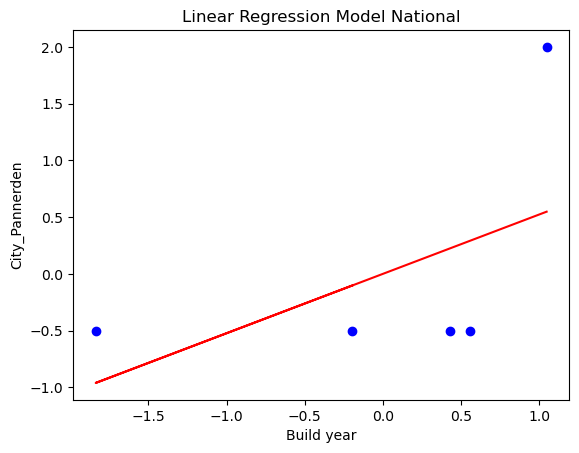

In [94]:
# Split the data into features (X) and target (y)
X = hl[['Build year']]
y = hl['City_Sassenheim']

# Create an instance of the LinearRegression class
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Make predictions using the model
predictions = model.predict(X)

# Plot the data and the model predictions
plt.scatter(X, y, c='blue')
plt.plot(X, predictions, c='red')
plt.xlabel('Build year')
plt.ylabel('City_Pannerden')
plt.title('Linear Regression Model National')
plt.show()

In [95]:
cv_linear_reg = cross_val_score(estimator = linear_reg, X = X, y = y, cv = 5)

y_pred_linear_reg_train = linear_reg.predict(X_train)
r2_score_linear_reg_train = r2_score(y_train, y_pred_linear_reg_train)

y_pred_linear_reg_test = linear_reg.predict(X_test)
r2_score_linear_reg_test = r2_score(y_test, y_pred_linear_reg_test)

rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_reg_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_linear_reg.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_linear_reg_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_linear_reg_test))
print('RMSE : {0:.3f}'.format(rmse_linear))

CV Linear Regression : nan
R2_score (train) : -0.386
R2_score (test) : nan
RMSE : 1.155


D:\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
D:\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
D:\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
D:\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
D:\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
D:\Anaconda\lib\site-packages\sklea

### Gradient Boosting

In [96]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

Ireland 

MSE: 0.7487852278052423


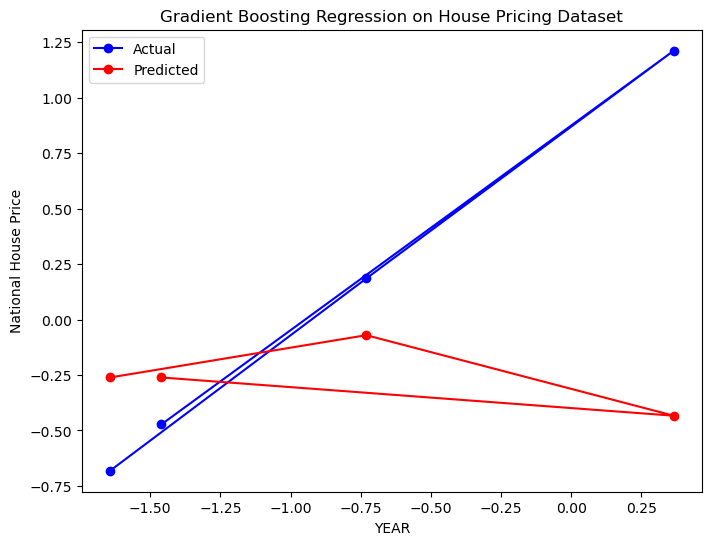

In [97]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(irl.drop('National', axis=1), irl['National'], test_size=0.2, random_state=42)

# Initialize the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05, max_depth=4, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) of the model
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse) 


# Visualize the results
plt.figure(figsize=(8, 6))
plt.plot(X_test['YEAR'], y_test, 'bo-', label='Actual')
plt.plot(X_test['YEAR'], y_pred, 'ro-', label='Predicted')
plt.title("Gradient Boosting Regression on House Pricing Dataset")
plt.xlabel("YEAR")
plt.ylabel("National House Price")
plt.legend()
plt.show()

Holland

MSE: 7.321926593100242e-17


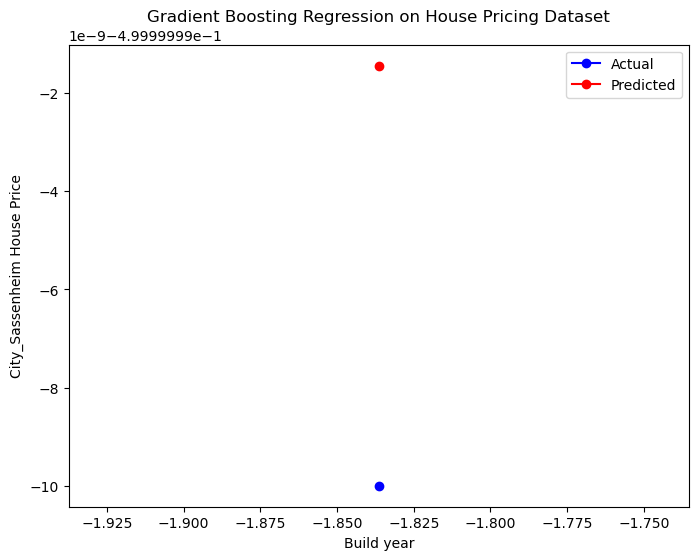

In [103]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(hl.drop('City_Sassenheim', axis=1), hl['City_Sassenheim'], test_size=0.2, random_state=42)

# Initialize the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05, max_depth=4, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) of the model
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse) 


# Visualize the results
plt.figure(figsize=(8, 6))
plt.plot(X_test['Build year'], y_test, 'bo-', label='Actual')
plt.plot(X_test['Build year'], y_pred, 'ro-', label='Predicted')
plt.title("Gradient Boosting Regression on House Pricing Dataset")
plt.xlabel("Build year")
plt.ylabel("City_Sassenheim House Price")
plt.legend()
plt.show()

### Support Vector Regression

In [100]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Ireland

National

MSE: 1.650823657029558


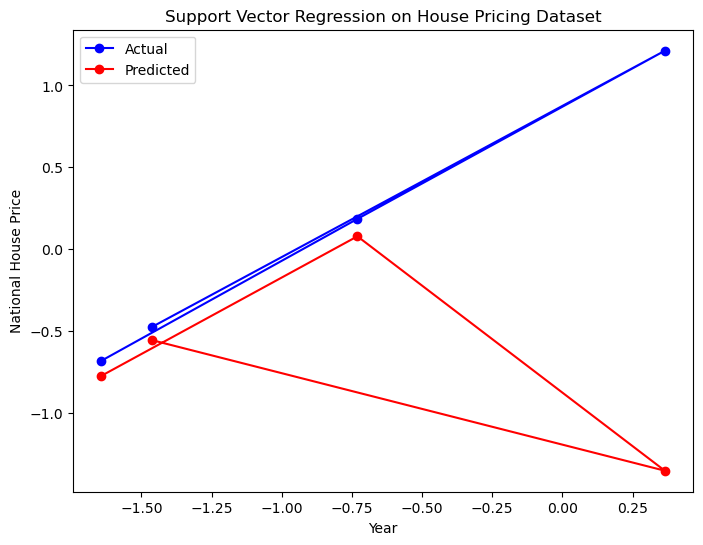

In [101]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(irl.drop('National', axis=1), irl['National'], test_size=0.2, random_state=42)

# Initialize the SVR model
model = SVR(kernel='linear')

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) of the model
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.plot(X_test['YEAR'], y_test, 'bo-', label='Actual')
plt.plot(X_test['YEAR'], y_pred, 'ro-', label='Predicted')
plt.title("Support Vector Regression on House Pricing Dataset")
plt.xlabel("Year")
plt.ylabel("National House Price")
plt.legend()
plt.show()

Holland

City_Sassenheim

In [104]:
hl.head()

Price  Build year  City_Pannerden  City_Sassenheim  City_Sint Pancras  City_Waddinxveen
0  0.646      -0.195          -0.500           -0.500              2.000            -0.500
1 -0.270      -1.836          -0.500           -0.500             -0.500             2.000
2  1.105       0.426          -0.500           -0.500             -0.500            -0.500
3 -1.787       0.559           2.000           -0.500             -0.500            -0.500
4  0.307       1.047          -0.500            2.000             -0.500            -0.500

MSE: 0.6438474487839831


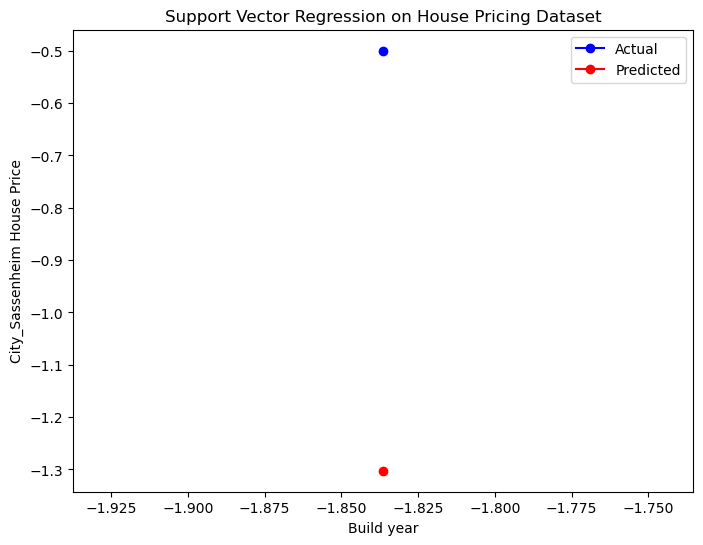

In [106]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(hl.drop('City_Sassenheim', axis=1), hl['City_Sassenheim'], test_size=0.2, random_state=42)

# Initialize the SVR model
model = SVR(kernel='linear')

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) of the model
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.plot(X_test['Build year'], y_test, 'bo-', label='Actual')
plt.plot(X_test['Build year'], y_pred, 'ro-', label='Predicted')
plt.title("Support Vector Regression on House Pricing Dataset")
plt.xlabel("Build year")
plt.ylabel("City_Sassenheim House Price")
plt.legend()
plt.show()

# Dashboard

In [2]:
!pip install dash pandas

In [3]:
!pip install pywedge

In [5]:
import pandas as pd 
import pywedge as pw 
# load datasets 

irl = pd.read_excel("ireland.xlsx") 
hl = pd.read_csv("holland.csv")

In [6]:
mc = pw.Pywedge_Charts(irl, c=None, y = "Dublin") 
charts = mc.make_charts()

D:\Anaconda\lib\site-packages\pywedge\pywedge.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  self.X = self.train.drop(self.y,1)


HTML(value='<h2>Pywedge Make_Charts </h2>')